# Movie Revenue Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The TMDB-Movies dataset contains data that was sourced from Kaggle.com and cleaned. Within the dataset are details regarding over 10,000 movies that were released between 1966 and 2015. The attributes within the dataset are organized into columns. Column names are id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, and revenue_adj. Revenue was adjusted to match dollar value of 2015.

>There are several attributes in the dataset, however only the following will be utilized for this report.
>1. Budget  
>2. Revenue 
>3. Original Title   
>4. Genre  

><b><u>Business Questions</b></u> 
>
>Which genre has the largest budget on average?  
>Which genre has the largest revenue on average?  
>Which genres appear to have the highest profitability and does this correlate with the budget?  
>Which directors have the largest budgets?



### Importing in the packages that will be imported for the analysis   

In [131]:
# Packages that will be imported for use in the report

import pandas as pd
import numpy as np
import statistics as stat
from scipy import stats
import csv

# Magic Keyword(s) for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# using seaborn for formatting
import seaborn as sns
sns.set()

### Function to plot graphs

In [224]:
#This function will be used to replace repetitive code that plots the graphs used to compare budget and revenue by genre
#Comparing the top 5

def myGrpPlot (df, grpVar, yVar, top=5):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[14, 6]);
    
    data = df.groupby(['genres'], as_index=False).mean(yVar).sort_values(by=[yVar], ascending=False).head(5)
    sns.barplot(data=data.sort_values(by=[yVar], ascending=False), x=yVar, y=grpVar, edgecolor='black', width=0.8);
    
    
    grpVar=grpVar.replace("_"," ") #replace _ with a space
    yVar=yVar.replace("_", " ") #replace _ with a space
    
    #Add and format a title
    plt.title(f' Mean of {yVar} by {grpVar}'.title(), fontsize = 14, weight = "bold")
    
    #Add and format x label
    plt.ylabel(grpVar.title(), fontsize = 10, weight = "bold")
    
    #Add and format y label
    plt.xlabel(f'Mean of {yVar}'.title(), fontsize = 10, weight = "bold")
              
    
    

<a id='wrangling'></a>
## Data Wrangling

>Loading data and printing a sample before cleaning and trimming it.

### General Properties

In [193]:
# Loading dataset and displaying sample data

df = pd.read_csv('tmdb-movies.csv')       #reading the csv file into df
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,$32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,$6.50,2015,"$137,999,939.30","$1,392,445,893.00"
1,76341,tt1392190,$28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,$7.10,2015,"$137,999,939.30","$348,161,292.50"
2,262500,tt2908446,$13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,$6.30,2015,"$101,199,955.50","$271,619,025.40"
3,140607,tt2488496,$11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,$7.50,2015,"$183,999,919.00","$1,902,723,130.00"
4,168259,tt2820852,$9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,$7.30,2015,"$174,799,923.10","$1,385,748,801.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,$0.08,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,$7.40,1966,$0.00,$0.00
10862,20379,tt0060472,$0.07,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,$5.70,1966,$0.00,$0.00
10863,39768,tt0060161,$0.07,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,$6.50,1966,$0.00,$0.00
10864,21449,tt0061177,$0.06,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,$5.40,1966,$0.00,$0.00


    All columns from the original .csv file are listed above

### Next Steps

>Cleaning the data to remove any of the columns that I will not be using in this report.

>The production company names are not all uniform, so to gather information from the data regarding which production company  
>brings in the most revenue I will be using the first word in the production company name and dropping the rest. 

>Similar to the production company, some movies have more than one director. For this report, I will only check for the first billed director, using the | as a delimiter. 

>For the sake of this analysis, the budget is going to be used synonymously with cost of the film.

>Zeros will be transformed into nan so the data will still be available. 


#### Creating a copy of the data that will be utilized in the report

In [192]:
#this dataframe will drop the unnecessary columns and provide a place to clean the data 

dfa = df.filter(['budget', 'revenue', 'original_title', 'genres', 'director', 'production_companies'], axis=1)

#quick check to make sure the data needed was copied
dfa

,budget,revenue,original_title,genres,director,production_companies
0,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...
1,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...
2,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...
3,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot
4,190000000,1506249360,Furious 7,Action|Crime|Thriller,James Wan,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Documentary,Bruce Brown,Bruce Brown Films
10862,0,0,Grand Prix,Action|Adventure|Drama,John Frankenheimer,Cherokee Productions|Joel Productions|Douglas ...
10863,0,0,Beregis Avtomobilya,Mystery|Comedy,Eldar Ryazanov,Mosfilm
10864,0,0,"What's Up, Tiger Lily?",Action|Comedy,Woody Allen,Benedict Pictures Corp.


##### Transforming director value to contain the fist listed director only

In [196]:
#transforming the data in the director column to contain only the first director listed using the | as the delimiter

dfa.director = dfa.director.str.split('|').str[0]      

#checking result
dfa.director


0           Colin Trevorrow
1             George Miller
2          Robert Schwentke
3               J.J. Abrams
4                 James Wan
                ...        
10861           Bruce Brown
10862    John Frankenheimer
10863        Eldar Ryazanov
10864           Woody Allen
10865      Harold P. Warren
Name: director, Length: 10866, dtype: object

##### Transforming the production company value to contain first listed company only

In [188]:
#transforming the data in the production companies column to contain only the first name. 
#Universal Pictures and Universal Studios are owned by the same parent company, so they will be calculated together
#This was not used , however, I am leaving this in for future analysis

dfa.production_companies = dfa.production_companies.str.split('|').str[0]           #this splits by the |
dfa.production_companies = dfa.production_companies.str.split('\s+').str[0]         #this splits by the first space
#checking result
dfa.production_companies


0        Universal
1          Village
2           Summit
3        Lucasfilm
4        Universal
           ...    
10822     Chenault
10828    Universal
10829    Paramount
10835    Twentieth
10848    Twentieth
Name: production_companies, Length: 3808, dtype: object

In [197]:
#transforming data in the genres column to contain only the initial genre for this exercise
dfa.genres = dfa.genres.str.split('|').str[0]            #this splits by the |
dfa.genres = dfa.genres.str.split('\s+').str[0]          #this splits by the first space
#checking result
print(dfa.genres)

0             Action
1             Action
2          Adventure
3             Action
4             Action
            ...     
10861    Documentary
10862         Action
10863        Mystery
10864         Action
10865         Horror
Name: genres, Length: 10866, dtype: object


In [205]:
#replacing all zeros with nan

dfa = dfa.replace(0, np.nan)

#checking result
dfa.budget, dfa.revenue

(0       $150,000,000.00
 1       $150,000,000.00
 2       $110,000,000.00
 3       $200,000,000.00
 4       $190,000,000.00
               ...      
 10861               NaN
 10862               NaN
 10863               NaN
 10864               NaN
 10865        $19,000.00
 Name: budget, Length: 10866, dtype: float64,
 0       $1,513,528,810.00
 1         $378,436,354.00
 2         $295,238,201.00
 3       $2,068,178,225.00
 4       $1,506,249,360.00
                ...       
 10861                 NaN
 10862                 NaN
 10863                 NaN
 10864                 NaN
 10865                 NaN
 Name: revenue, Length: 10866, dtype: float64)

<a id='eda'></a>
# Exploratory Data Analysis

##### The following section contains the analyses used to answer the business questions posed at the beginning of this report


### Which genres have the largest budget on average?

Calculating the mean budget for each genre

In [206]:
gb = dfa.filter(['budget', 'genres'])                 #filtering to work with the genre and budget columns

#grouping by genre, calculating the mean budget, and sorting by budget from highest to lowest
gb = gb.groupby(['genres'], as_index=False).mean('budget').sort_values(by=['budget'], ascending=False)

pd.options.display.float_format = '${:,.2f}'.format
gb.head(10)                                           #display the top 10 results


,genres,budget
1,Adventure,"$64,771,522.76"
2,Animation,"$60,996,027.70"
7,Family,"$51,821,337.25"
18,War,"$49,896,666.67"
8,Fantasy,"$45,885,265.14"
15,Science,"$44,782,181.32"
0,Action,"$42,319,584.22"
19,Western,"$37,259,717.41"
10,History,"$31,869,045.68"
12,Music,"$28,437,838.24"


### Which directors have the largest average budgets?

Checking to see which directors are given the largest budgets

In [207]:
db = dfa.filter(['budget', 'director'])               #filtering to work only with director and budget for this portion

#grouping by director, calculating mean budget, and sorting by budget from highest to lowest
db = db.groupby(['director'], as_index=False).mean('budget').sort_values(by=['budget'], ascending=False)

pd.options.display.float_format = '${:,.2f}'.format   #formatting to remove scientific notation
db.head(10)


,director,budget
4279,Sngmoo Lee,"$425,000,000.00"
3353,Nathan Greno,"$260,000,000.00"
947,Dan Scanlon,"$200,000,000.00"
1152,David Yates,"$193,750,000.00"
2966,Mark Andrews,"$185,000,000.00"
3958,Robert Stromberg,"$180,000,000.00"
241,Andrew Stanton,"$178,000,000.00"
3598,Pete Docter,"$175,000,000.00"
488,Bob Peterson,"$175,000,000.00"
648,Carl Rinsch,"$175,000,000.00"


### Which director has the highest average revenue for their movies?

Calculating the mean revenue for each director

In [208]:
dr = dfa.filter(['revenue', 'director'])               #filtering out everything except director and revenue

#grouping by director, calculating mean revenue, and sorting by revenue from highest to lowest
dr = dr.groupby(['director'], as_index=False).mean('revenue').sort_values(by=['revenue'], ascending=False)

pd.options.display.float_format = '${:,.2f}'.format    #formatting to remove the scientific notation

dr.head(10)                                            #display top 10 results

,director,revenue
736,Chris Buck,"$1,274,219,009.00"
2721,Kyle Balda,"$1,156,730,962.00"
1840,Irwin Winkler,"$1,106,279,658.00"
1152,David Yates,"$1,038,573,906.25"
3598,Pete Docter,"$853,708,609.00"
2793,Lee Unkrich,"$812,994,083.50"
866,Colin Trevorrow,"$758,768,301.00"
3958,Robert Stromberg,"$758,410,378.00"
3711,Pierre Coffin,"$757,137,935.00"
947,Dan Scanlon,"$743,559,607.00"


### Which directors appear to be most profitable on average?

Calculating the mean net for each director

In [209]:
#average profit calculation
gd = dfa.filter(['director', 'budget', 'revenue'])                              #filtering to work with relevant columns
gd['net'] = gd['revenue'] - gd['budget']                                        #calculating the net
df = gd.groupby(['director'], as_index=False).mean('net')                       #grouping by director and calculating the mean

df = df.filter(['director', 'net']).sort_values(by=['net'], ascending=False)    #filtering to use only director and net, sorting by net and then highest to lowest
pd.options.display.float_format = '${:,.2f}'.format                             #formatting to remove scientific notation

df.head(10)



,director,net
736,Chris Buck,"$1,124,219,009.00"
1840,Irwin Winkler,"$1,084,279,658.00"
2721,Kyle Balda,"$1,082,730,962.00"
1152,David Yates,"$844,823,906.25"
3711,Pierre Coffin,"$684,637,935.00"
866,Colin Trevorrow,"$683,393,301.00"
3598,Pete Docter,"$678,708,609.00"
2793,Lee Unkrich,"$655,494,083.50"
1918,James Cameron,"$635,249,357.88"
2515,Joss Whedon,"$606,065,786.00"


### Which genre brings in the most revenue on average?  

Calculating revenue grouped by genre and then sorting from highest to lowest

In [210]:
grevenue = dfa.filter(['revenue', 'genres'])                               #filtering a copy to work with the columns relevant
grevenue = grevenue.groupby(['genres'], as_index=False).mean('revenue')    #grouping by genre and calculating the mean of revenue
grsort = grevenue.sort_values(by=['revenue'], ascending=False)             #sorting from highest to lowest

pd.options.display.float_format = '${:,.2f}'.format                        #formatting to remove scientific notation
grsort.head(10)

,genres,revenue
2,Animation,"$239,975,401.78"
1,Adventure,"$207,102,002.16"
7,Family,"$180,703,117.92"
15,Science,"$165,499,044.77"
8,Fantasy,"$134,587,855.35"
18,War,"$123,115,995.82"
0,Action,"$117,098,270.12"
10,History,"$92,946,056.19"
14,Romance,"$83,891,529.77"
17,Thriller,"$65,343,063.99"


### Which genres average the greatest difference between revenue and budget?  


Calculate the net profit for each genre

In [211]:
gd = dfa.filter(['genres', 'budget', 'revenue'])                #filtering a copy to work with the columns relevant
gd['net'] = gd['revenue'] - gd['budget']                        #calculating the net by subtracting budget ||in place of cost|| from revenue
viewnet = gd.groupby(['genres'], as_index=False).mean('net')    #grouping by genre and calculating the mean of net                                  

df = viewnet.filter(['genres', 'net'])                          #working with only the genre and net
dfs = df.sort_values(by=['net'], ascending=False)               #sorting by net and highest to lowest

pd.options.display.float_format = '${:,.2f}'.format             #formatting to show in dollars and removing scientific notation

#display results
dfs.head(10)

,genres,net
2,Animation,"$196,120,336.39"
7,Family,"$157,162,190.30"
1,Adventure,"$156,508,037.14"
15,Science,"$121,068,186.65"
8,Fantasy,"$104,174,957.69"
0,Action,"$84,183,068.51"
10,History,"$78,283,960.41"
18,War,"$76,275,625.20"
14,Romance,"$73,836,632.76"
3,Comedy,"$52,576,575.22"


### Are the genres with the highest profitabilty also those with higher budgets?

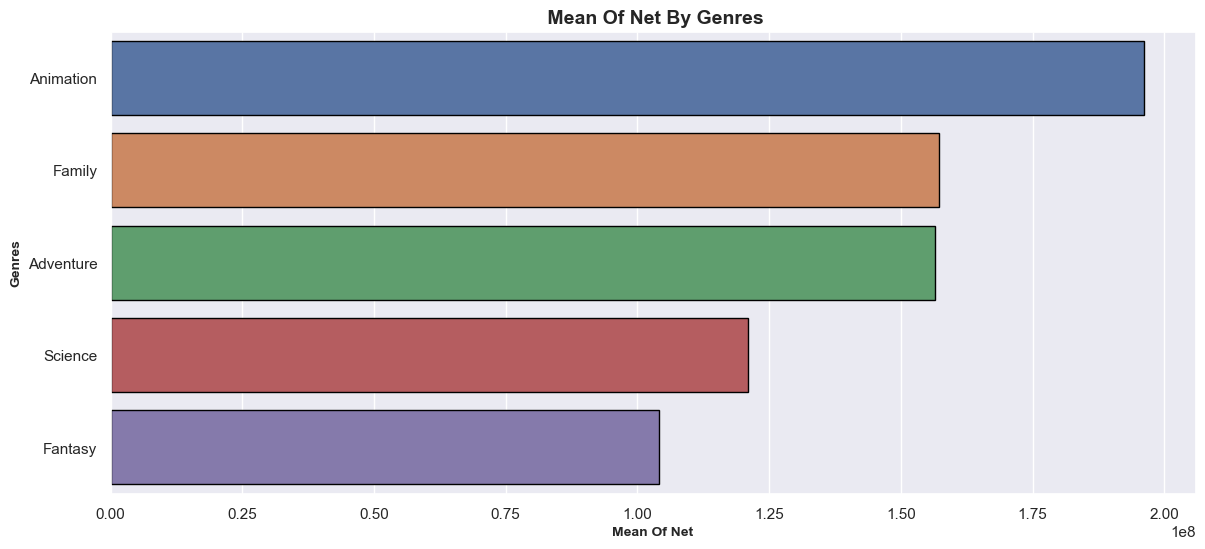

In [225]:
#Bar Chart of Net by genre
#Using function to graph results 

myGrpPlot(dfs, 'genres', 'net')



#### The animation genre has the highest mean net profit.

This is followed by Family, Adventure Science and Fantasy.

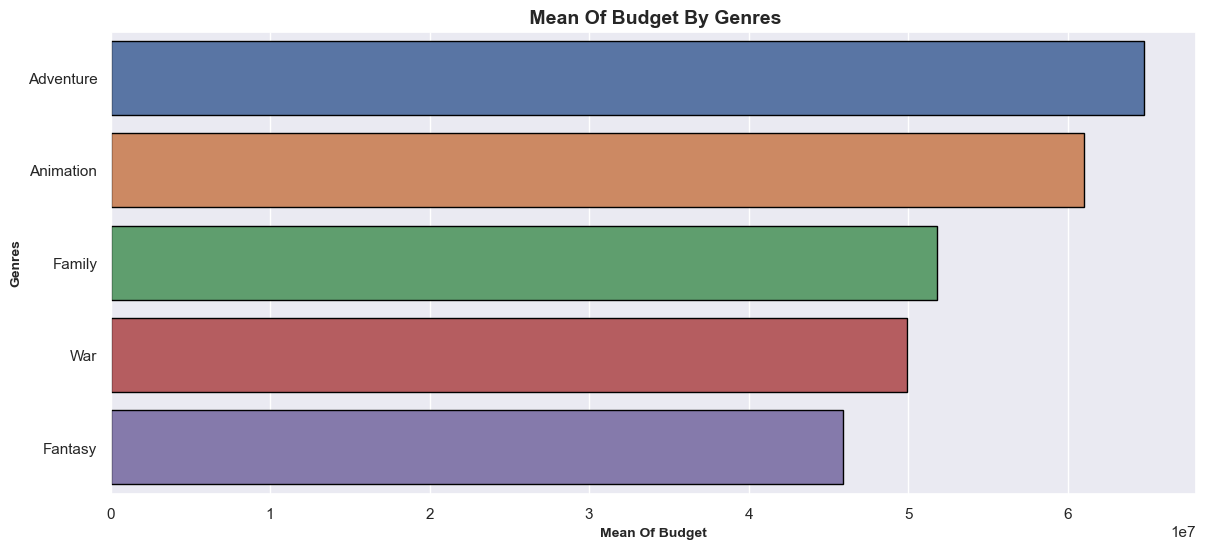

In [228]:
#Bar Chart of Budget by genre
#Using function to graph

myGrpPlot(dfa, 'genres', 'budget')

#Old barplot-saving for future use just in case
#sns.barplot(data=viewnet.sort_values('budget', ascending=False).head(5), x="budget", y="genres")



#### The Adventure genre has the highest mean budget.

This is followed by Animation, then Family, War and Fantasy.

###     Observations

Four of the five genres in the top five for budget and net are the same. 
Science is the fourth highest for net whereas War is the fouth highest for budget. 






### Analyzing budget and net correlations

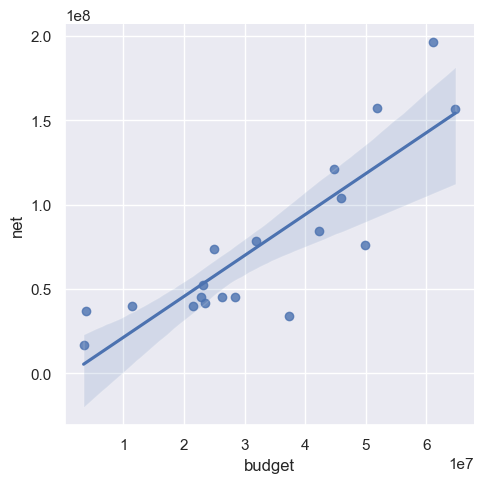

In [229]:
#Calculating and plotting budget and net with a best fit line to visualize trends between the two
sns.lmplot(x="budget", y="net", data=viewnet);

##### It appears that there is at least a weak correleation between the budge and net profit, however, this does not calculate the p-value, so it is not apparent whether it is a statistically significant correleation or just the appearance of correlation.

<a id='conclusions'></a>
## Conclusions

>There are many limitations to working with this dataset. For this report, I found that the calculations and business questions were highly over-simplified due to the fact that budget does not equate cost, and thus it is impossible to say what the true profit margins are. In addition, the budjet used in this report has not been adjusted and further analysis is needed to gain a clearer understanding of the results.
>  

>In answer to the business questions originally posed, it appears that Animation is the genre with the most average revenue followed closely by Adventure. The limitations to this are that most of the movies were categorized in multiple genres, so this is not an accurate reflection but rather a high level overview and general idea of what kinds of revenue can be expected for these categories of films.  
>In keeping with the high level generalizations, the genre with the highest 'profitability' on average is also animation, followed this time by Family. There are only 2 animation movies and 7 Adventure movie based on the initial tag for the movies, so this is not an exact representation.  
>  
It does appear that the amount spent on budget tends to result in a higher profit margin based on the calculations performed for this report.  
>  
Finally, the directors with the highest budgets are Sngmoo Lee,	Nathan Greno, Dan Scanlon, David Yates, and Mark Andrew. These are not the same directors with the highest profits, so it could be beneficial to more in depth statistical measures to investigate further.

## Limitations

>As discussed above, there are several limitations to consider while working with this particular data. Among those is the fact that my personal working knowledge of the data is in and of itself limited and I don't have the ability to consult with someone who is more acquainted with the data as one would expect to see in the workplace.  
  
>In addition to the limitations regarding the over-simplified business questions, one must make assumptions about whether revenue is a complete report, or if other factors, such as sales of goods like t-shirts or books based on the movie is included, and of course, budget is not the actual cost of making the movie, so it is unclear if movies have come in over or under budget, thus making the calculation for 'net profit' more of a conceptual rather than exact result.

#### Resources used to assist with this report:

>https://pandas.pydata.org/  
>https://www.w3schools.com/python  
>https://stackoverflow.com/  
>https://www.sfu.ca/~mjbrydon/tutorials/BAinPy